In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

1. Task To Do:

In [4]:
def softmax(z):
    """
    z: (n, c)
    return: (n, c) each row sums to 1
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [5]:
import numpy as np
def test_softmax():
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]
    for i, (z, desc) in enumerate(test_cases):
        result = softmax(z)
        assert np.allclose(result.sum(axis=1), 1), f"Sum not 1 in {desc}"
        assert np.all(result >= 0), f"Negative prob in {desc}"
        print(f"Test {i+1} passed: {desc}")
    print("All tests passed for softmax!")
test_softmax()

Test 1 passed: All zeros
Test 2 passed: Simple case
Test 3 passed: Large identical values
Test 4 passed: Small identical values
Test 5 passed: Mixed positive and negative
All tests passed for softmax!


2. Task To Do:

In [6]:
def loss_softmax(y_true, y_pred):
    """
    y_true: (c,) one-hot
    y_pred: (c,) probs
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10))


In [7]:
import numpy as np
def test_loss_softmax():
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.8)), "Test 1 failed"

    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.3)), "Test 2 failed"

    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.01, 0.98, 0.01])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.98)), "Test 3 failed"

    print("All test cases passed!")
test_loss_softmax()


All test cases passed!


3. Task To Do:

In [8]:
import numpy as np
def cost_softmax(X, y, W, b):
    """
    X: (n, d)
    y: (n, c) one-hot
    W: (d, c)
    b: (c,)
    """
    n = X.shape[0]
    z = X @ W + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [9]:
def test_cost_softmax():
    X = np.array([[1, 2], [2, 3], [3, 4]])
    y = np.array([[1, 0], [0, 1], [1, 0]])
    W = np.array([[1, -1], [-1, 1]])
    b = np.array([0, 0])
    z = X @ W + b
    y_pred = softmax(z)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test 1 Failed"

    X = np.array([[1, 0], [0, 1], [1, 1]])
    y = np.array([[1, 0], [0, 1], [1, 0]])
    W = np.zeros((2, 2))
    b = np.zeros(2)
    z = X @ W + b
    y_pred = softmax(z)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test 2 Failed"

    print("All test cases passed!")
test_cost_softmax()


All test cases passed!


Task 4: Compute Gradient + Test

In [11]:
def compute_gradient_softmax(X, y, W, b):
    """
    returns grad_W (d,c), grad_b (c,)
    """
    n = X.shape[0]
    z = X @ W + b
    y_pred = softmax(z)

    grad_W = (X.T @ (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b

def test_compute_gradient_softmax():
    X = np.array([[1, 2], [3, 4]])
    y = np.array([[1, 0], [0, 1]])
    W = np.array([[0.1, 0.2], [0.3, 0.4]])
    b = np.array([0.01, 0.02])

    z = X @ W + b
    y_pred = softmax(z)
    grad_W_expected = (X.T @ (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "grad_W mismatch"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "grad_b mismatch"
    print("All tests passed for compute_gradient_softmax!")

test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


Task 5: Gradient Descent (Train Softmax Regression)

In [12]:
def gradient_descent_softmax(X, y, W, b, alpha=0.01, n_iter=500, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W = W - alpha * grad_W
        b = b - alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iter {i}: Cost = {cost:.6f}")

    return W, b, cost_history

Task 6: Predict Function + Test

In [13]:
def predict_softmax(X, W, b):
    z = X @ W + b
    probs = softmax(z)
    return np.argmax(probs, axis=1)

def test_predict_softmax():
    np.random.seed(0)
    n, d, c = 10, 5, 3
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    preds = predict_softmax(X, W, b)
    assert preds.shape == (n,), "Shape mismatch"
    assert np.all(preds >= 0) and np.all(preds < c), "Out of class range"
    assert np.issubdtype(preds.dtype, np.integer), "Not integer labels"

    print("All tests passed for predict_softmax!")

test_predict_softmax()

All tests passed for predict_softmax!


Evaluation Function (Confusion Matrix, Precision, Recall, F1)

In [14]:
def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1

Load Iris + Quick Check

In [17]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [20]:
df = pd.read_csv("Iris.csv")   # make sure file is uploaded in Colab
df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# Common iris.csv has last column as species
X = df.iloc[:, 0:4].values
y_labels = df.iloc[:, 4].values


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# drop Id column if it exists
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

# Features
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

# Labels (string)
y = df["Species"].values

# Encode string labels -> 0,1,2
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot for softmax training
onehot = OneHotEncoder(sparse_output=False)
y_onehot = onehot.fit_transform(y_encoded.reshape(-1, 1))

print("X shape:", X.shape)
print("y_onehot shape:", y_onehot.shape)
print("Classes:", label_encoder.classes_)
print("First 5 one-hot rows:\n", y_onehot[:5])

X shape: (150, 4)
y_onehot shape: (150, 3)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
First 5 one-hot rows:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Train/Test Split + Standard Scaling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(
    X, y_onehot, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train X:", X_train_scaled.shape, "Train y:", y_train.shape)
print("Test X:", X_test_scaled.shape, "Test y:", y_test.shape)

Train X: (120, 4) Train y: (120, 3)
Test X: (30, 4) Test y: (30, 3)


Initialize Parameters + Train Model + Plot Cost

Iter 0: Cost = 1.053296
Iter 100: Cost = 0.393364
Iter 200: Cost = 0.320806
Iter 300: Cost = 0.280685
Iter 400: Cost = 0.252095
Iter 500: Cost = 0.229969
Iter 600: Cost = 0.212183
Iter 700: Cost = 0.197546
Iter 800: Cost = 0.185290
Iter 900: Cost = 0.174882
Iter 999: Cost = 0.166019


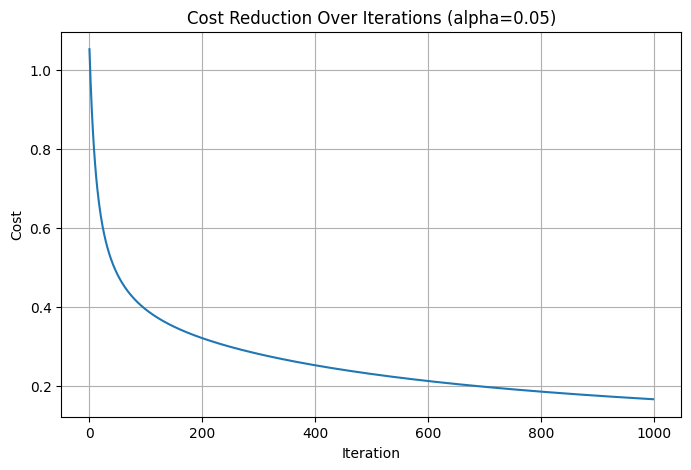

Initial Cost: 1.0532964197552108
Final Cost: 0.16601868886595905


In [24]:
np.random.seed(0)
d = X_train_scaled.shape[1]   # features
c = y_train.shape[1]          # classes

W_init = np.random.randn(d, c) * 0.01
b_init = np.zeros(c)

alpha = 0.05
n_iter = 1000

W_opt, b_opt, cost_history = gradient_descent_softmax(
    X_train_scaled, y_train, W_init, b_init,
    alpha=alpha, n_iter=n_iter, show_cost=True
)

plt.figure(figsize=(8, 5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title(f"Cost Reduction Over Iterations (alpha={alpha})")
plt.grid(True)
plt.show()

print("Initial Cost:", cost_history[0])
print("Final Cost:", cost_history[-1])

Predict + Evaluate on Train and Test

In [25]:
train_pred = predict_softmax(X_train_scaled, W_opt, b_opt)
test_pred = predict_softmax(X_test_scaled, W_opt, b_opt)

cm_train, p_train, r_train, f1_train = evaluate_classification(y_train_labels, train_pred)
cm_test, p_test, r_test, f1_test = evaluate_classification(y_test_labels, test_pred)

print("=== TRAIN RESULTS ===")
print("Confusion Matrix:\n", cm_train)
print("Precision:", p_train)
print("Recall:", r_train)
print("F1-score:", f1_train)

print("\n=== TEST RESULTS ===")
print("Confusion Matrix:\n", cm_test)
print("Precision:", p_test)
print("Recall:", r_test)
print("F1-score:", f1_test)

=== TRAIN RESULTS ===
Confusion Matrix:
 [[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]
Precision: 0.9585157390035438
Recall: 0.9583333333333334
F1-score: 0.9583268218992551

=== TEST RESULTS ===
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-score: 0.9333333333333333
